Read the csv file using pandas

In [1]:
import numpy as np
import pandas as pd

input_file = "../data/network_backup_dataset.csv"
df = pd.read_csv(input_file, header = 0)
labels = df.columns
for i, v in enumerate(labels):
    print "labels[" + str(i) + "] => " + v

labels[0] => Week #
labels[1] => Day of Week
labels[2] => Backup Start Time - Hour of Day
labels[3] => Work-Flow-ID
labels[4] => File Name
labels[5] => Size of Backup (GB)
labels[6] => Backup Time (hour)


In [2]:
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

def get_date_number(tup):
    '''
    return the no. of the date
    parameter tup is (week id, day of week)
    '''
    return (tup[0] - 1) * 7 + week.index(tup[1])

In [3]:
workflow_num = len(df.groupby(labels[3])) # the number of the workflow

period = 105
info = dict() # the format is {"work_flow_#" : {"File_#" : [xx, xx, xx]}}

for work_file_id, agg in df.groupby([labels[3], labels[4]]):
    flow_id = work_file_id[0]
    file_id = work_file_id[1]
    
    if flow_id not in info:
        info[flow_id] = dict()
    if file_id not in info[flow_id]:
        info[flow_id][file_id] = [0] * period
    for week_day, p in agg.groupby([labels[0], labels[1]]):
        info[flow_id][file_id][get_date_number(week_day)] = sum(p[labels[5]])

In [4]:
# the maximum period is 105
def plot_backup_size(period):
    x = range(period)
    
    for work_flow_id in info:
        value = info[work_flow_id]
        for file_id in value:
            plt.plot(x, value[file_id][: period], label = "file_" + str(file_id))
            plt.title(work_flow_id + ', period = ' + str(period))
            plt.xlabel('Number of days')
            plt.ylabel('Size of Backup (GB)')
        plt.legend(loc = 1, fancybox = True, framealpha = 0.5, prop = {'size': 8})
        plt.show()

1(a)
---

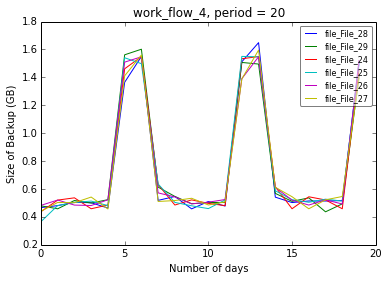

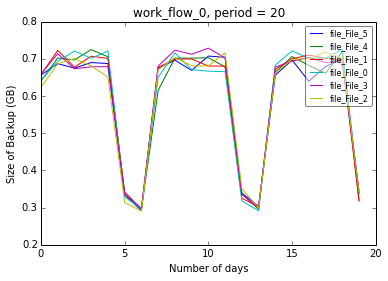

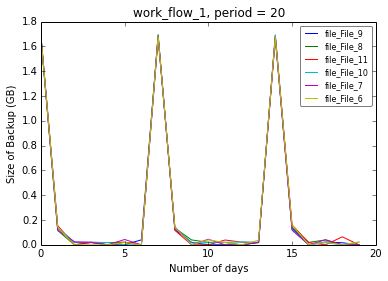

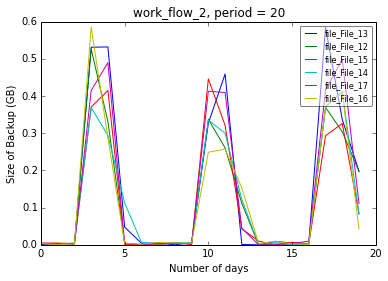

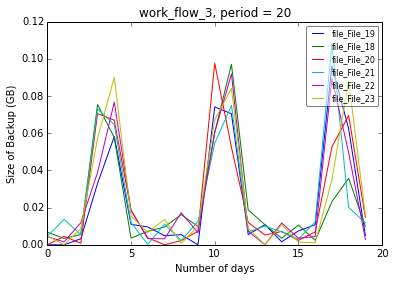

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plot_backup_size(20)

1(b)
---

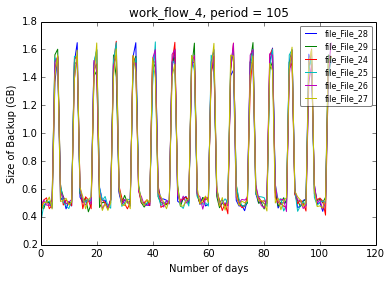

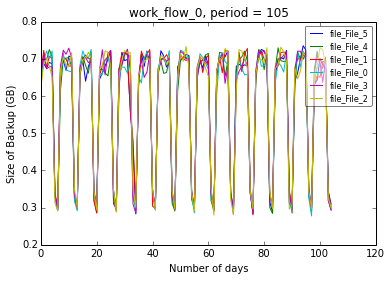

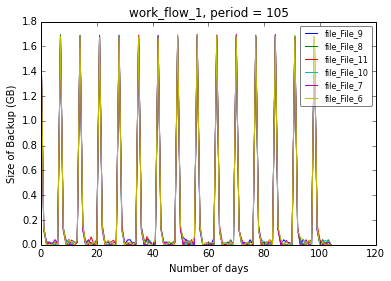

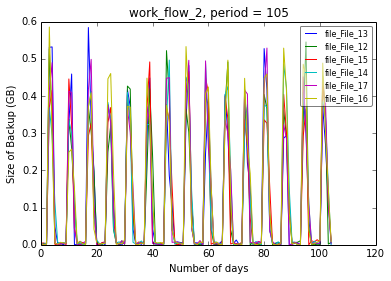

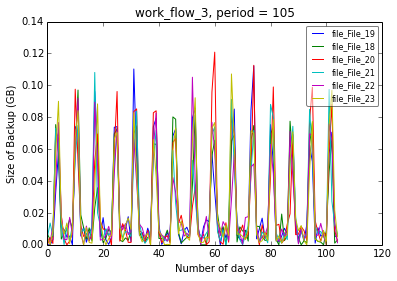

In [6]:
plot_backup_size(105)